* **Name: Magnus Aghe** 
* **Student ID: 900400010** 
* **Email: m.aghe0010@student.nu.edu** 
* **Course: ANA680 - MODULE 4 PROJECT - FETAL HEALTH CLASSIFICATION**

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
!pip install --upgrade scikit-learn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [4]:
# Loading the dataset

df=pd.read_csv("fetal_health.csv")

In [5]:
df.shape

(2126, 22)

The dataset has 2126 rows and 22 columns

In [6]:
df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [7]:
df.info

<bound method DataFrame.info of       baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerat

In [8]:
# Listing the column names

df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [9]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [10]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [11]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There is no missing value in the dataset.

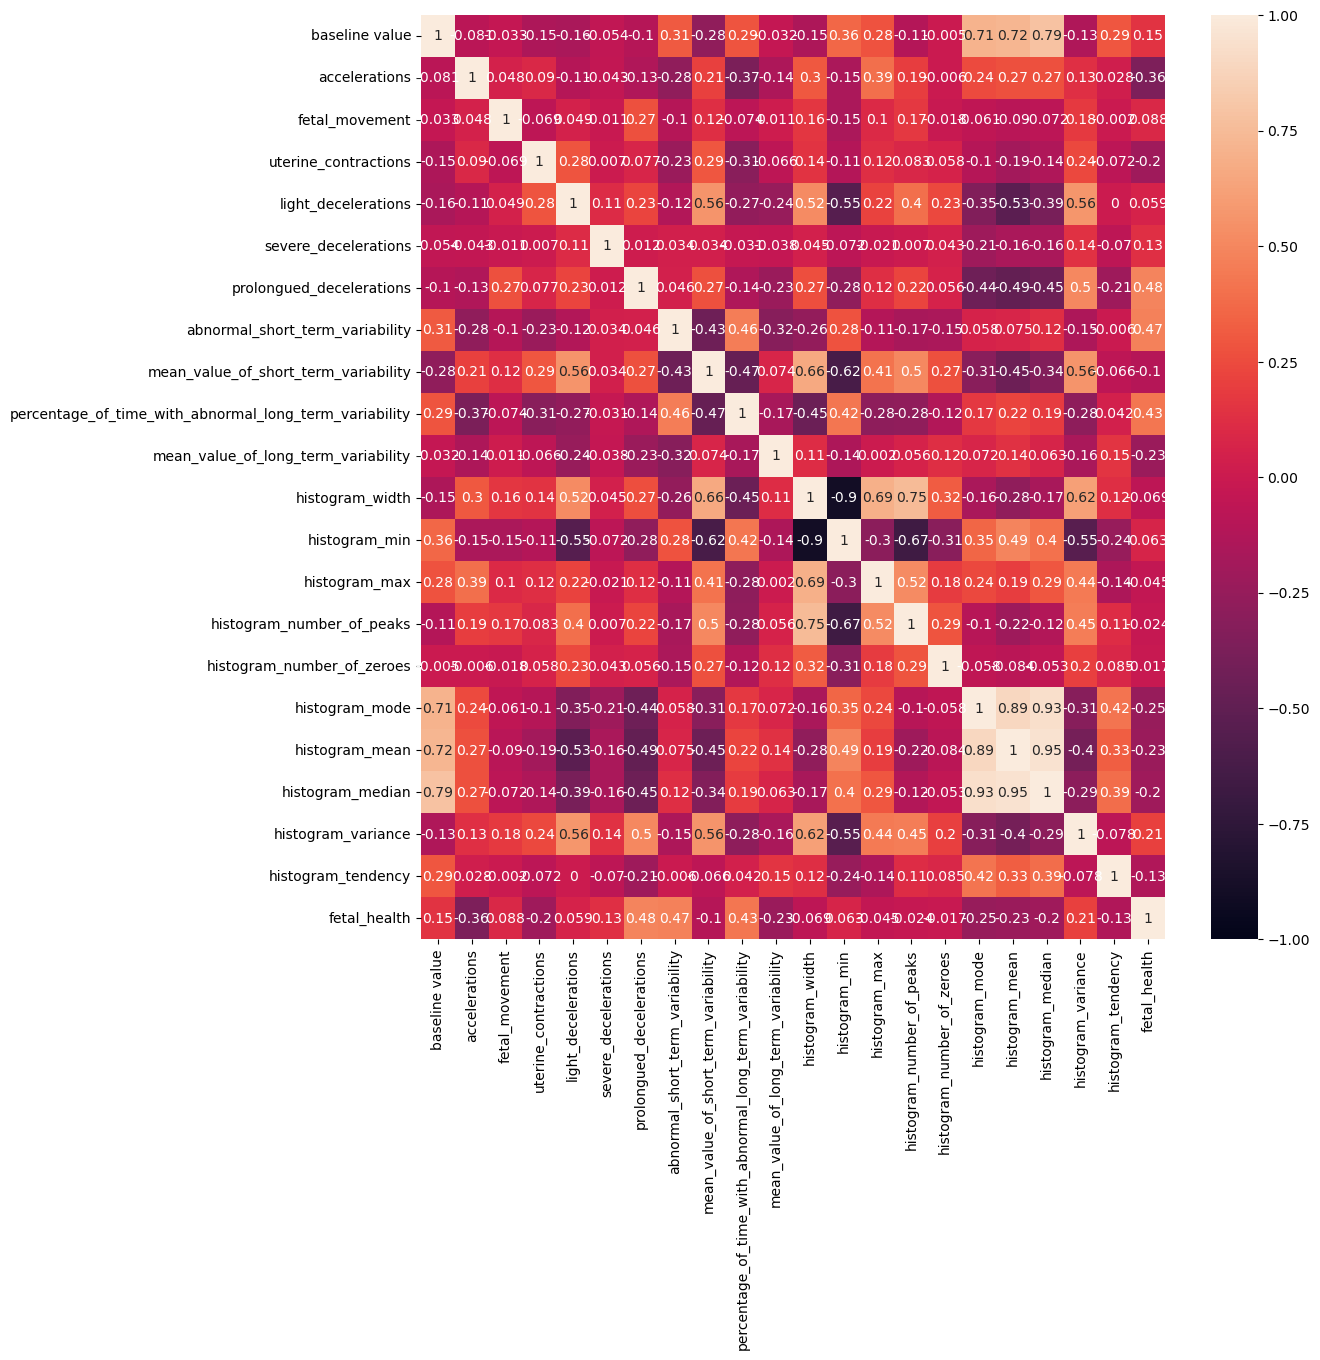

In [12]:
# Using correlation matrix and heatmap for feature selection

corr=df.corr().round(3)
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.show()

In [13]:
fetalhealth_corr = df.corr()
print(fetalhealth_corr['fetal_health'].sort_values(ascending=False)) 

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

**Feature Selection Technique: Variance Inflation Factor**

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [15]:
W = df.drop('fetal_health', axis=1)
def calc_vif(W):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = W.columns
    vif["VIF"] = [variance_inflation_factor(W.values, i) for i in range(W.shape[1])]

    return(vif)

In [16]:
calc_vif(W.select_dtypes(include=['float','int']))

,variables,VIF
0,baseline value,1058.823853
1,accelerations,4.801485
2,fetal_movement,1.184827
3,uterine_contractions,4.034365
4,light_decelerations,4.799432
5,severe_decelerations,1.136294
6,prolongued_decelerations,2.926905
7,abnormal_short_term_variability,16.051631
8,mean_value_of_short_term_variability,9.457023
9,percentage_of_time_with_abnormal_long_term_var...,2.417343


We shall drop features with high VIF i.e. features with VIF values greater than 5, because of their high multicollinearity as well as "inf" values.

In [17]:
df2 = df[['accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 
          'prolongued_decelerations', 'percentage_of_time_with_abnormal_long_term_variability', 
          'histogram_number_of_zeroes', 'histogram_variance', 'histogram_tendency', 'fetal_health']]

In [18]:
new_fetalhealth_corr = df2.corr()
print(new_fetalhealth_corr['fetal_health'].sort_values(ascending=False)) 

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_tendency                                       -0.131976
uterine_contractions                                     -0.204894
accelerations                                            -0.364066
Name: fetal_health, dtype: float64


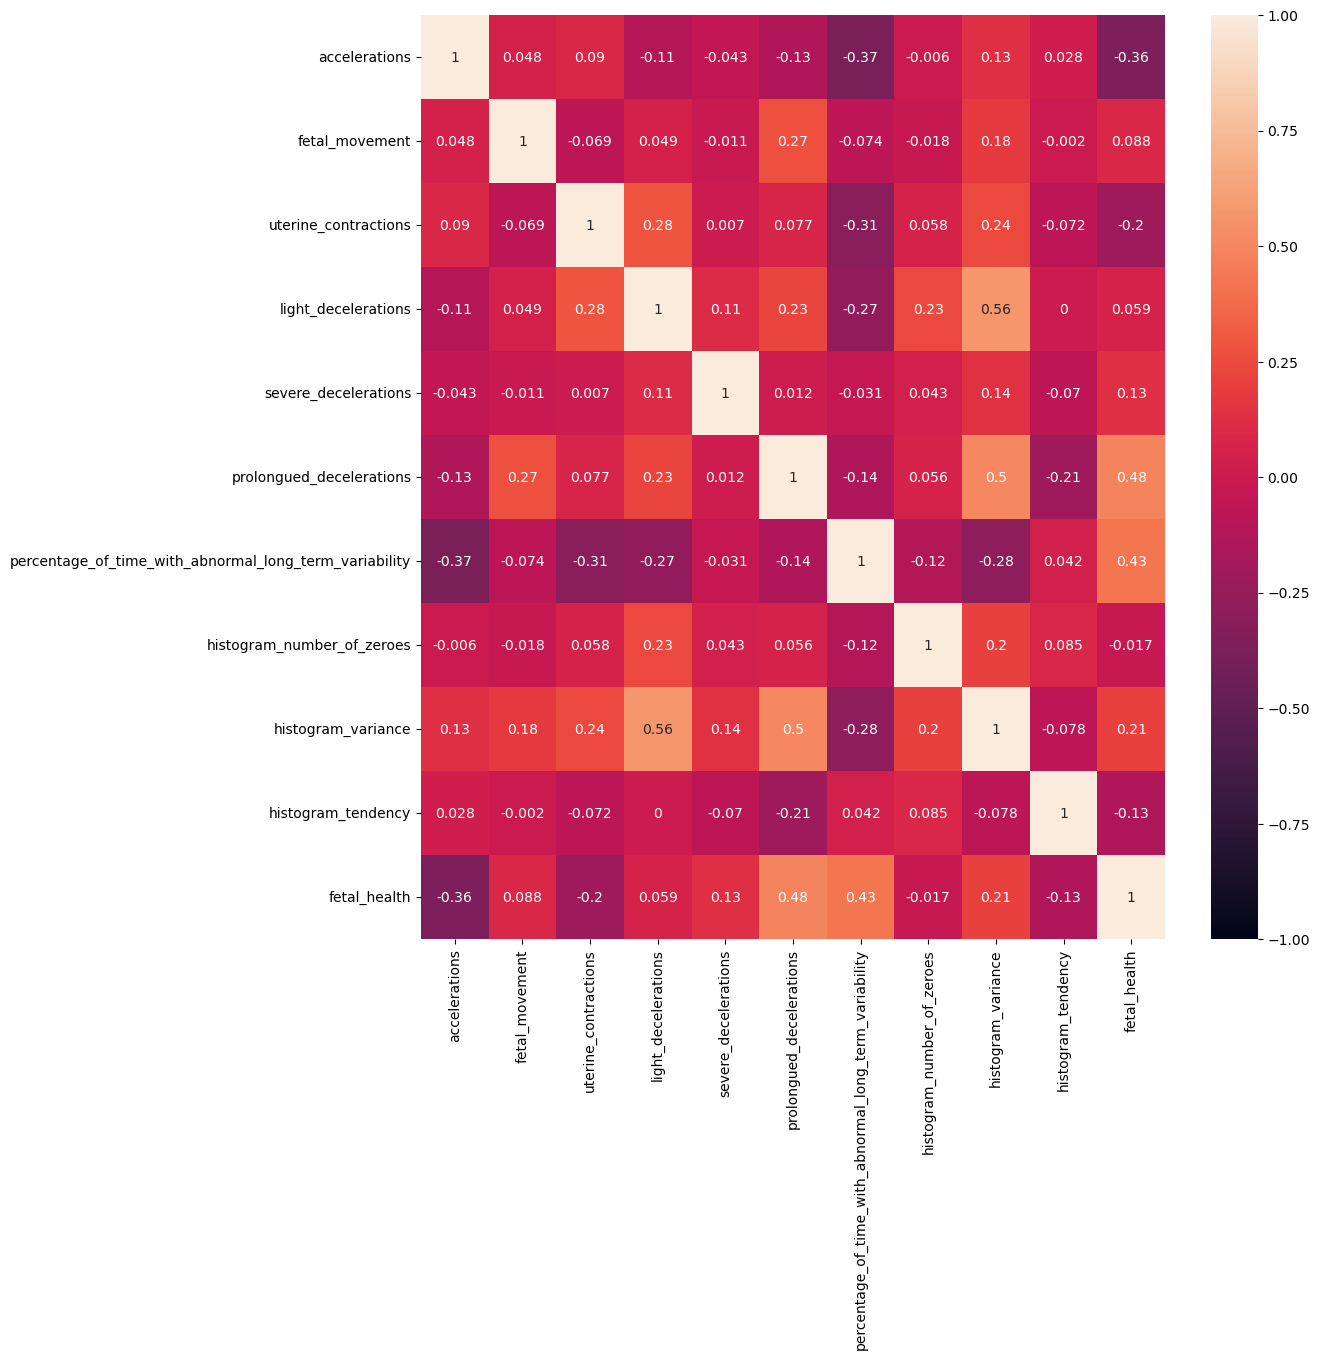

In [19]:
new_corr=df2.corr().round(3)
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(new_corr, vmin=-1, vmax=1, annot=True)
plt.show()

**We shall be using as our predictors, the five features that have the most correlation with fetal_health. They are prolongued_decelerations, percentage_of_time_with_abnormal_long_term_variability, accelerations,  histogram_variance, and uterine_contractions.**

accelerations and uterine_contractions are quite strongly negatively correlated with fetal_health.

In [20]:
# Converting 'fetal_health' to categorical 

df2['fetal_health'] = df2['fetal_health'].astype('category')

In [21]:
# Number of values in the "fetal_health" categorical feature

df2['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [22]:
# Summing up the count size of 'fetal_health'

df2['fetal_health'].value_counts().sum()

2126

In [23]:
# Let's map the fetal_health categorical values to its actual meaning 
df2['fetal_health'] = df2['fetal_health'].map({1:'Normal', 2:'Suspect', 3:'Pathological'})
df2

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,percentage_of_time_with_abnormal_long_term_variability,histogram_number_of_zeroes,histogram_variance,histogram_tendency,fetal_health
0,0.000,0.000,0.000,0.000,0.0,0.0,43.0,0.0,73.0,1.0,Suspect
1,0.006,0.000,0.006,0.003,0.0,0.0,0.0,1.0,12.0,0.0,Normal
2,0.003,0.000,0.008,0.003,0.0,0.0,0.0,1.0,13.0,0.0,Normal
3,0.003,0.000,0.008,0.003,0.0,0.0,0.0,0.0,13.0,1.0,Normal
4,0.007,0.000,0.008,0.000,0.0,0.0,0.0,0.0,11.0,1.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...
2121,0.000,0.000,0.007,0.000,0.0,0.0,25.0,0.0,2.0,0.0,Suspect
2122,0.001,0.000,0.007,0.000,0.0,0.0,22.0,0.0,3.0,1.0,Suspect
2123,0.001,0.000,0.007,0.000,0.0,0.0,20.0,0.0,4.0,1.0,Suspect
2124,0.001,0.000,0.006,0.000,0.0,0.0,27.0,0.0,4.0,1.0,Suspect


**Building the Classification Models**

In [24]:
# Selecting predictor and target variables

X = df2[['prolongued_decelerations', 'percentage_of_time_with_abnormal_long_term_variability', 'accelerations',  
        'histogram_variance', 'uterine_contractions']]
Y = df2['fetal_health']

In [25]:
# Splitting the dataset such that the test data size is 25% of the total dataset


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7)

**Model 1 - Logistic Regression**

In [26]:
# Training the model and predicting on test data

logreg = LogisticRegression()
logreg.fit(X_train, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Normal','Suspect','Pathological']))

Logistic Regression
Accuracy: 0.7857142857142857
Confusion Matrix:
[[382   3  21]
 [ 28   9  18]
 [ 43   1  27]]

              precision    recall  f1-score   support

      Normal       0.84      0.94      0.89       406
     Suspect       0.69      0.16      0.26        55
Pathological       0.41      0.38      0.39        71

    accuracy                           0.79       532
   macro avg       0.65      0.49      0.52       532
weighted avg       0.77      0.79      0.76       532



**Model 2 - k Nearest Neighbor (k-NN)**

In [27]:
# Training the model and predicting on test data

knn7 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn7.fit(X_train, y_train.ravel())
y_pred = knn7.predict(X_test)

print("k Nearest Neighbor")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Normal','Suspect','Pathological']))

k Nearest Neighbor
Accuracy: 0.7988721804511278
Confusion Matrix:
[[377   6  23]
 [ 32  18   5]
 [ 40   1  30]]

              precision    recall  f1-score   support

      Normal       0.84      0.93      0.88       406
     Suspect       0.72      0.33      0.45        55
Pathological       0.52      0.42      0.47        71

    accuracy                           0.80       532
   macro avg       0.69      0.56      0.60       532
weighted avg       0.78      0.80      0.78       532



**Model 3 - Linear SVM**

In [28]:
# Training the model and predicting on test data

lsvm = SVC(kernel = 'linear', random_state = 0)  
lsvm.fit(X_train, y_train.ravel())
y_pred = lsvm.predict(X_test)

print("Linear SVM")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Normal','Suspect','Pathological']))

Linear SVM
Accuracy: 0.7650375939849624
Confusion Matrix:
[[380   1  25]
 [ 37   0  18]
 [ 44   0  27]]

              precision    recall  f1-score   support

      Normal       0.82      0.94      0.88       406
     Suspect       0.00      0.00      0.00        55
Pathological       0.39      0.38      0.38        71

    accuracy                           0.77       532
   macro avg       0.40      0.44      0.42       532
weighted avg       0.68      0.77      0.72       532



**Model 4 - Kernel SVM**

In [29]:
# Training the model and predicting on test data

rsvm = SVC(kernel = 'rbf', random_state = 0)  
rsvm.fit(X_train, y_train.ravel())
y_pred = rsvm.predict(X_test)

print("Kernel SVM")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Normal','Suspect','Pathological']))

Kernel SVM
Accuracy: 0.8007518796992481
Confusion Matrix:
[[384   2  20]
 [ 35  15   5]
 [ 44   0  27]]

              precision    recall  f1-score   support

      Normal       0.83      0.95      0.88       406
     Suspect       0.88      0.27      0.42        55
Pathological       0.52      0.38      0.44        71

    accuracy                           0.80       532
   macro avg       0.74      0.53      0.58       532
weighted avg       0.79      0.80      0.78       532



**Model 5 - Naive Bayes**

In [30]:
# Training the model and predicting on test data

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=['Normal','Suspect','Pathological']))

Naive Bayes
Accuracy: 0.8026315789473685
Confusion Matrix:
 [[362   4  40]
 [ 15  19  21]
 [ 23   2  46]]
              precision    recall  f1-score   support

      Normal       0.91      0.89      0.90       406
     Suspect       0.76      0.35      0.47        55
Pathological       0.43      0.65      0.52        71

    accuracy                           0.80       532
   macro avg       0.70      0.63      0.63       532
weighted avg       0.83      0.80      0.80       532



**Model 6 - Decision Tree**

In [31]:
# Training the model and predicting on test data

dtree = DecisionTreeClassifier(criterion='gini',random_state=0) 
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

print("Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Normal','Suspect','Pathological']))

Decision Tree
Accuracy: 0.8364661654135338
Confusion Matrix:
[[372   7  27]
 [ 12  38   5]
 [ 31   5  35]]

              precision    recall  f1-score   support

      Normal       0.90      0.92      0.91       406
     Suspect       0.76      0.69      0.72        55
Pathological       0.52      0.49      0.51        71

    accuracy                           0.84       532
   macro avg       0.73      0.70      0.71       532
weighted avg       0.83      0.84      0.83       532



**Model 7 - Random Forest**

In [32]:
# Training the model and predicting on test data

rfc = RandomForestClassifier (max_depth=10, random_state=0, n_estimators=10)
rfc.fit(X_train,y_train.ravel())
y_pred=rfc.predict(X_test)

print("Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred, target_names=['Normal','Suspect','Pathological']))

Random Forest
Accuracy: 0.8778195488721805
Confusion Matrix:
[[390   7   9]
 [  8  43   4]
 [ 33   4  34]]

              precision    recall  f1-score   support

      Normal       0.90      0.96      0.93       406
     Suspect       0.80      0.78      0.79        55
Pathological       0.72      0.48      0.58        71

    accuracy                           0.88       532
   macro avg       0.81      0.74      0.77       532
weighted avg       0.87      0.88      0.87       532



**Model 8 - XGBoost**

In [33]:
from sklearn.preprocessing import LabelEncoder

# Converting target labels
le = LabelEncoder()
encoded_y_train = le.fit_transform(y_train)
encoded_y_test = le.transform(y_test)

# Training the model and predicting on test data

xg = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xg.fit(X_train, encoded_y_train)
y_pred = xg.predict(X_test)

# Reversing the labels back 
y_pred_original_labels = le.inverse_transform(y_pred)

print("XGBoost")
print(f"Accuracy: {accuracy_score(encoded_y_test, y_pred)}")
print(classification_report(y_test, y_pred_original_labels, target_names=['Normal','Suspect','Pathological']))

XGBoost
Accuracy: 0.8646616541353384
              precision    recall  f1-score   support

      Normal       0.91      0.94      0.92       406
     Suspect       0.79      0.76      0.78        55
Pathological       0.62      0.51      0.56        71

    accuracy                           0.86       532
   macro avg       0.77      0.74      0.75       532
weighted avg       0.86      0.86      0.86       532



**From the above we shall pick Random Forest as our preferred model as it had the best accuracy of 87.78%. It also had the best precision for all categories of fetal_health (Normal, Suspect and Pathological).**

**Tuning the Random Forest Model**

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [35]:
param_grid = { 
    'n_estimators': [10, 25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [10, 15, 20], 
    'max_leaf_nodes': [10, 15, 20], 
} 

In [36]:
# First, let's use GridSearchCV to obtain the best parameters for the model.

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=10, max_leaf_nodes=20, n_estimators=25)


In [37]:
# Updating the Random Forest Model

rfc_grid = RandomForestClassifier (max_depth=10, random_state=7, n_estimators=25, max_leaf_nodes=20)
rfc_grid.fit(X_train,y_train.ravel())
y_pred_grid=rfc_grid.predict(X_test)

print("Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_grid)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_grid)}\n")
print(classification_report(y_test, y_pred_grid, target_names=['Normal','Suspect','Pathological']))

Random Forest
Accuracy: 0.8703007518796992
Confusion Matrix:
[[390   4  12]
 [  9  41   5]
 [ 38   1  32]]

              precision    recall  f1-score   support

      Normal       0.89      0.96      0.93       406
     Suspect       0.89      0.75      0.81        55
Pathological       0.65      0.45      0.53        71

    accuracy                           0.87       532
   macro avg       0.81      0.72      0.76       532
weighted avg       0.86      0.87      0.86       532



**After tuning the hyperparameters, Random Forest Model's accuracy decreased to 87.03%. This is undesirable so we shall stick to the original Random Forest model accuracy of 87.78%**

In [38]:
import pickle
# Open a file and use dump() 
with open('file_fetalhealth.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(rfc, file)